In [32]:
import numpy as np    # linear algebra
import pandas as pd   # file handling
import seaborn as sns   # for graphical representation
df = pd.read_csv('/kaggle/input/sql-injection-dataset/Modified_SQL_Dataset.csv')




,Query,Label
0,""" or pg_sleep ( __TIME__ ) --",1
1,create user name identified by pass123 tempora...,1
2,AND 1 = utl_inaddr.get_host_address ( ...,1
3,select * from users where id = '1' or @ @1 ...,1
4,"select * from users where id = 1 or 1#"" ( ...",1
...,...,...
30914,DELETE FROM door WHERE grow = 'small',0
30915,DELETE FROM tomorrow,0
30916,SELECT wide ( s ) FROM west,0
30917,SELECT * FROM ( SELECT slide FROM breath ),0


<Axes: xlabel='Label', ylabel='count'>

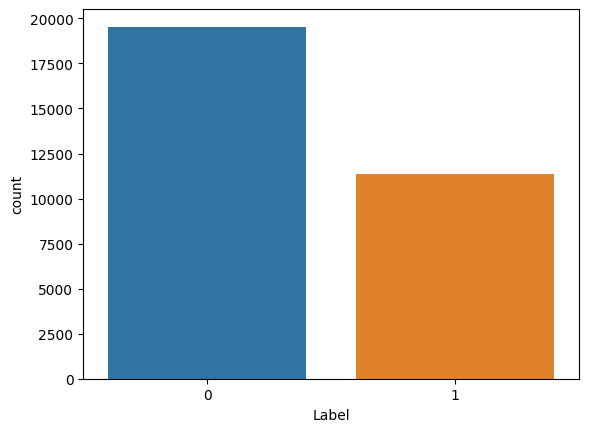

In [33]:
sns.countplot(data = df, x = 'Label')   

In [34]:
from nltk import ngrams
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords 
import nltk


In [35]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer( min_df=2, max_df=0.7, stop_words=stopwords.words('english'))
# print (vectorizer)
posts = vectorizer.fit_transform(df['Query'].values.astype('U')).toarray()


In [36]:
# np.random.shuffle(posts)
transformed_posts=pd.DataFrame(posts)
df=pd.concat([df,transformed_posts],axis=1)
X=df[df.columns[2:]]
y=df['Label']
X


,0,1,2,3,4,5,6,7,8,9,...,6584,6585,6586,6587,6588,6589,6590,6591,6592,6593
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30914,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [38]:
#Linear Logistic Regression 

from sklearn.linear_model import LogisticRegression
lr_model = LogisticRe2gression(max_iter=1000)
lr_model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [39]:
from sklearn.metrics import accuracy_score
y_pred=lr_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy using Logistic Regression : ",acc)

Accuracy using Logistic Regression :  0.943078913324709


In [40]:
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer


In [41]:
#Feed Forward Neural Network

input_dim = X_train.shape[1]  # Number of features
print(input_dim)

model = Sequential()
model.add(layers.Dense(30, input_dim=input_dim, activation='relu'))  #First Hidden 
model.add(layers.Dense(10,  activation='relu'))                      #Second Hidden
model.add(layers.Dense(870, activation='relu'))                      #Third Hidden

model.add(layers.BatchNormalization())         # Prevent Vanishing Gradients
model.add(layers.Dropout(0.5))                 # Prevent Overfitting
model.add(layers.Dense(1, activation='sigmoid'))     # Output

6594


In [42]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [43]:
ffnn = model.fit(X_train,y_train,
                    epochs=8,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=15)

Epoch 1/8
1649/1649 [==============================] - 10s 6ms/step - loss: 0.1753 - accuracy: 0.9421 - val_loss: 0.1202 - val_accuracy: 0.9615
Epoch 2/8
1649/1649 [==============================] - 8s 5ms/step - loss: 0.0993 - accuracy: 0.9747 - val_loss: 0.1099 - val_accuracy: 0.9675
Epoch 3/8
1649/1649 [==============================] - 8s 5ms/step - loss: 0.0834 - accuracy: 0.9791 - val_loss: 0.1379 - val_accuracy: 0.9652
Epoch 4/8
1649/1649 [==============================] - 8s 5ms/step - loss: 0.0815 - accuracy: 0.9797 - val_loss: 0.1159 - val_accuracy: 0.9628
Epoch 5/8
1649/1649 [==============================] - 9s 5ms/step - loss: 0.0799 - accuracy: 0.9806 - val_loss: 0.1213 - val_accuracy: 0.9630
Epoch 6/8
1649/1649 [==============================] - 9s 5ms/step - loss: 0.0799 - accuracy: 0.9804 - val_loss: 0.1765 - val_accuracy: 0.9594
Epoch 7/8
1649/1649 [==============================] - 9s 5ms/step - loss: 0.0776 - accuracy: 0.9807 - val_loss: 0.1443 - val_accuracy: 0.961

In [44]:
prediction=model.predict(X_test)

194/194 [==============================] - 1s 3ms/step


In [45]:

length = len(prediction)
for i in range(length):
    if prediction[i]>0.5:
        prediction[i]=1
    elif prediction[i]<=0.5:
        prediction[i]=0


In [46]:
# accuracy_score(y_test,pred)

In [47]:
def recall_function(true_positive,false_negative):
    
    recall=true_positive / (true_positive+false_negative)
    
    return recall

In [48]:
def precision_function(true_positive,false_positive):
    
    precision = true_positive / (true_positive+false_positive)
    
    return precision

In [49]:
def F1_score_function(precision,recall):
    
    F1_score =  (2*precision*recall) /(precision + recall)
    
    return F1_score

In [50]:
def accuracy_function(tp,tn,fp,fn):
    
    accuracy = (tp+tn) / (tp+tn+fp+fn)
    
    return accuracy

In [51]:
def confusion_matrix(truth,predicted):
    
    true_positive = 0
    true_negative = 0
    false_positive = 0
    false_negative = 0
    
    for true,pred in zip(truth,predicted):
        if true == 1:
            if pred == true:
                true_positive += 1
            elif pred != true:
                false_negative += 1

        elif true == 0:
            if pred == true:
                true_negative += 1
            elif pred != true:
                false_positive += 1
            
    accuracy=accuracy_function(true_positive, true_negative, false_positive, false_negative)
    precision=precision_function(true_positive, false_positive)
    recall=recall_function(true_positive, false_negative)
    return (accuracy,precision,recall)

In [52]:
accuracy,precision,recall=confusion_matrix(y_test,prediction)
f1 = F1_score_function(precision,recall)
print("Accuracy : ",accuracy)
print ("Precision : ",precision)
print("Recall : ",recall)
print("F1 Score : ",f1)

Accuracy :  0.9586028460543338
Precision :  0.9863080684596577
Recall :  0.8984409799554566
F1 Score :  0.9403263403263403


In [53]:
def make_predictions(index):
    
    print("Query : ",df.iloc[index,0])
    my_test = df.iloc[[index],2:]
    pred = model.predict(my_test)
    if(pred>0.5):
        pred=1
    else :
        pred=0
    label = df.iloc[index,1]
    print("Prediction : ",pred)
    print("Label : ",label)
    if(pred == label):
        print("Correct Prediction")
    else :
        print("Wrong Prediction")
    print("\n")

In [54]:
make_predictions(0)
make_predictions(1)
make_predictions(9234)
make_predictions(15023)
make_predictions(29000)

Query :  " or pg_sleep  (  __TIME__  )  --
1/1 [==============================] - 0s 22ms/step
Prediction :  1
Label :  1
Correct Prediction


Query :  create user name identified by pass123 temporary tablespace temp default tablespace users;
1/1 [==============================] - 0s 22ms/step
Prediction :  0
Label :  1
Wrong Prediction


Query :  -6014'   )    )    or   (  9860  =  4848  )  *4848 and    (    (   'qtge'  =  'qtge
1/1 [==============================] - 0s 22ms/step
Prediction :  1
Label :  1
Correct Prediction


Query :  5323
1/1 [==============================] - 0s 23ms/step
Prediction :  0
Label :  0
Correct Prediction


Query :  SELECT * FROM large WHERE own BETWEEN '1996-07-01' AND '1996-07-31'
1/1 [==============================] - 0s 23ms/step
Prediction :  0
Label :  0
Correct Prediction


